# **Data understanding, Visulization**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data understand
df = pd.read_csv("https://raw.githubusercontent.com/superbijk/assignment-knn2/main/combined_customer_data.csv?token=AMGZUGZTNCDHXBHV4L3Q32K7TRK5G")
df

,CustomerKey,CurrentAge,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,NumberCarsOwned,TotalPaid,DateDiffMonthPlusOne,AvgSpendFromFirstAndLast,BikeBuyer
0,11000,49,M,90000,2,0,Bachelors,Professional,0,9115.1343,29,314.3149,1
1,11001,44,M,60000,3,3,Bachelors,Professional,1,7054.1879,36,195.9496,1
2,11002,49,M,60000,3,3,Bachelors,Professional,1,8966.0144,26,344.8467,1
3,11003,47,F,70000,0,0,Bachelors,Professional,1,8993.9159,30,299.7971,1
4,11004,41,F,80000,5,5,Bachelors,Professional,4,9056.5913,29,312.2962,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,51,M,30000,1,0,Graduate Degree,Clerical,0,2264.2536,1,2264.2536,1
18480,29480,43,F,30000,3,0,Graduate Degree,Clerical,0,2698.4434,1,2698.4434,1
18481,29481,55,M,30000,3,0,Graduate Degree,Clerical,0,3729.3640,1,3729.3640,1
18482,29482,56,M,30000,3,0,Bachelors,Clerical,0,2264.2536,1,2264.2536,1


In [3]:
df.describe()

,CustomerKey,CurrentAge,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,TotalPaid,DateDiffMonthPlusOne,AvgSpendFromFirstAndLast,BikeBuyer
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,20241.500000,51.176531,57305.777970,1.844352,1.004058,1.502705,1755.103931,6.169282,490.783511,0.494049
std,5336.015523,11.536142,32285.841703,1.612408,1.522660,1.138394,2347.276085,8.513600,813.662575,0.499978
min,11000.000000,34.000000,10000.000000,0.000000,0.000000,0.000000,2.530500,1.000000,1.404300,0.000000
25%,15620.750000,42.000000,30000.000000,0.000000,0.000000,1.000000,55.217000,1.000000,41.183500,0.000000
50%,20241.500000,49.000000,60000.000000,2.000000,0.000000,2.000000,298.643400,1.000000,132.578000,0.000000
75%,24862.250000,59.000000,70000.000000,3.000000,2.000000,2.000000,2774.959075,10.000000,476.283250,1.000000
max,29483.000000,104.000000,170000.000000,5.000000,5.000000,4.000000,14691.395500,37.000000,4068.389300,1.000000


In [4]:
# rename columns
df = df.rename(columns={'CustomerKey':'CustomerID',
                       'CurrentAge':'Age',
                       'YearlyIncome':'Annual_Income',
                       'NumberChildrenAtHome':'ChildrenAtHome',
                       'EnglishEducation':'Education',
                       'EnglishOccupation':'Occupation',
                       'NumberCarsOwned':'CarsOwned',
                       'AvgSpendFromFirstAndLast':'AvgSpend_Month'})
# drop columns
df = df.drop(columns = ['TotalPaid','DateDiffMonthPlusOne'])


In [5]:
# discretization age group
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)
df

,CustomerID,Age,Gender,Annual_Income,TotalChildren,ChildrenAtHome,Education,Occupation,CarsOwned,AvgSpend_Month,BikeBuyer,AgeGroup
0,11000,49,M,90000,2,0,Bachelors,Professional,0,314.3149,1,40-49
1,11001,44,M,60000,3,3,Bachelors,Professional,1,195.9496,1,40-49
2,11002,49,M,60000,3,3,Bachelors,Professional,1,344.8467,1,40-49
3,11003,47,F,70000,0,0,Bachelors,Professional,1,299.7971,1,40-49
4,11004,41,F,80000,5,5,Bachelors,Professional,4,312.2962,1,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,51,M,30000,1,0,Graduate Degree,Clerical,0,2264.2536,1,50-59
18480,29480,43,F,30000,3,0,Graduate Degree,Clerical,0,2698.4434,1,40-49
18481,29481,55,M,30000,3,0,Graduate Degree,Clerical,0,3729.3640,1,50-59
18482,29482,56,M,30000,3,0,Bachelors,Clerical,0,2264.2536,1,50-59


Text(0.5, 0, 'Not Buy(0) VS Buy(1)')

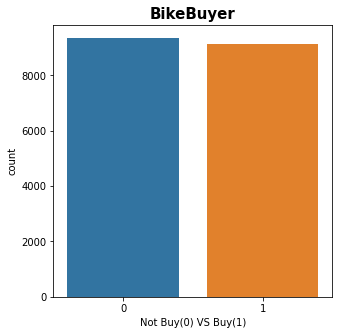

In [6]:
# plot target
fig = plt.figure(figsize=(5,5))
sns.countplot(x='BikeBuyer', data=df).set_title('BikeBuyer',fontweight="bold",fontsize=15)
plt.xlabel('Not Buy(0) VS Buy(1)')

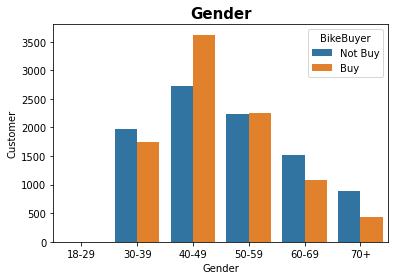

In [7]:
# plot gender
sns.countplot(x="AgeGroup", hue='BikeBuyer', data=df).set_title('Gender', fontweight="bold",fontsize=15)
plt.xlabel("Gender")
plt.ylabel("Customer")
plt.legend(title='BikeBuyer', labels=['Not Buy', 'Buy'])

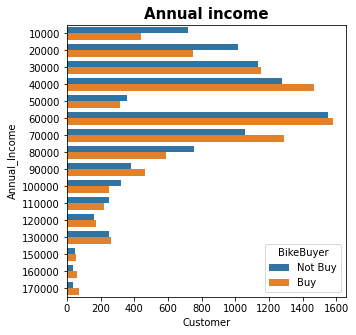

In [8]:
#plot annual income
fig = plt.figure(figsize=(5,5))
sns.countplot(y='Annual_Income', hue='BikeBuyer', data=df).set_title('Annual income',fontweight="bold",fontsize=15)
plt.xlabel("Customer")
plt.legend(title='BikeBuyer', labels=['Not Buy', 'Buy'])

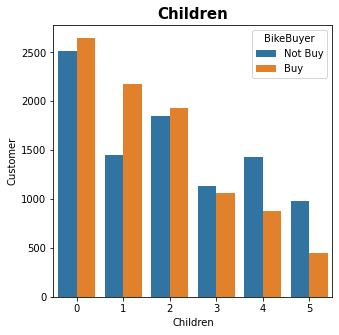

In [9]:
# plot childern number
fig = plt.figure(figsize=(5,5))
sns.countplot(x='TotalChildren', hue='BikeBuyer', data=df).set_title('Children', fontweight="bold", fontsize=15)
plt.xlabel("Children")
plt.ylabel("Customer")
plt.legend(title='BikeBuyer', labels=['Not Buy', 'Buy'])

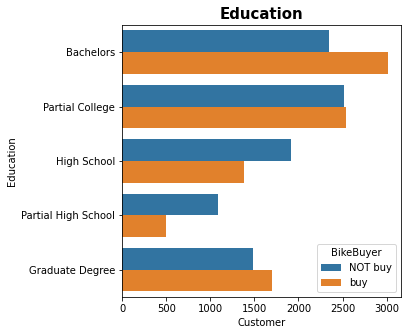

In [10]:
# plot education
fig = plt.figure(figsize=(5,5))
sns.countplot(y='Education', hue='BikeBuyer', data=df).set_title('Education', fontweight="bold", fontsize=15)
plt.xlabel("Customer")
plt.legend(title='BikeBuyer', labels=['NOT buy', 'buy'])

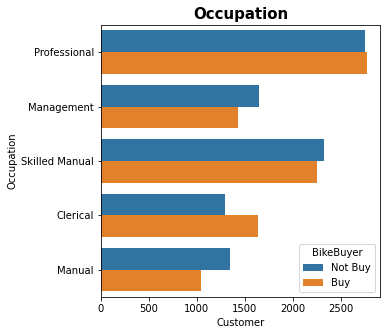

In [11]:
# plot occupation
fig = plt.figure(figsize=(5,5))
sns.countplot(y='Occupation', hue='BikeBuyer', data=df).set_title('Occupation',fontweight="bold",fontsize=15)
plt.ylabel("Occupation")
plt.xlabel("Customer")
plt.legend(title='BikeBuyer', labels=['Not Buy', 'Buy'])

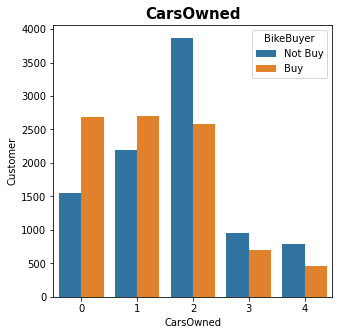

In [12]:
# plot car owned
fig = plt.figure(figsize=(5,5))
sns.countplot(x='CarsOwned', hue='BikeBuyer', data=df).set_title('CarsOwned',fontweight="bold",fontsize=15)
plt.ylabel("Customer")
plt.legend(title='BikeBuyer', labels=['Not Buy', 'Buy'])

Text(0.5, 6.79999999999999, 'Not Buy(0) VS Buy(1)')

<Figure size 360x360 with 0 Axes>

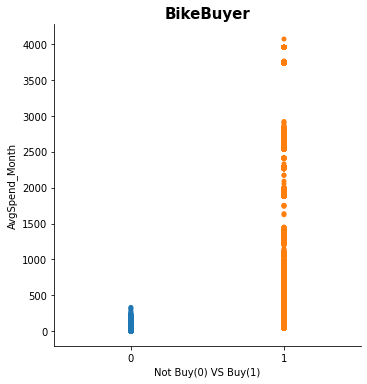

In [13]:
# plot avg spend
fig = plt.figure(figsize=(5,5))
sns.catplot(x="BikeBuyer", y="AvgSpend_Month", jitter=False, data=df)
plt.title('BikeBuyer',fontweight="bold",fontsize=15)
plt.xlabel('Not Buy(0) VS Buy(1)')

# **KNN with TotalPaid and AvgSpendFromFirstAndLast**

### Data loading, preparation

In [14]:
# initialize the random number generator
import random
random.seed(1)

In [15]:
# loading data
import numpy as np
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/superbijk/assignment-knn2/main/combined_customer_data.csv?token=AMGZUGZTNCDHXBHV4L3Q32K7TRK5G")
data

,CustomerKey,CurrentAge,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,NumberCarsOwned,TotalPaid,DateDiffMonthPlusOne,AvgSpendFromFirstAndLast,BikeBuyer
0,11000,49,M,90000,2,0,Bachelors,Professional,0,9115.1343,29,314.3149,1
1,11001,44,M,60000,3,3,Bachelors,Professional,1,7054.1879,36,195.9496,1
2,11002,49,M,60000,3,3,Bachelors,Professional,1,8966.0144,26,344.8467,1
3,11003,47,F,70000,0,0,Bachelors,Professional,1,8993.9159,30,299.7971,1
4,11004,41,F,80000,5,5,Bachelors,Professional,4,9056.5913,29,312.2962,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,51,M,30000,1,0,Graduate Degree,Clerical,0,2264.2536,1,2264.2536,1
18480,29480,43,F,30000,3,0,Graduate Degree,Clerical,0,2698.4434,1,2698.4434,1
18481,29481,55,M,30000,3,0,Graduate Degree,Clerical,0,3729.3640,1,3729.3640,1
18482,29482,56,M,30000,3,0,Bachelors,Clerical,0,2264.2536,1,2264.2536,1


In [16]:
# data prepration
data_prep = data

# drop unnecessary columns (CustomerKey and DateDiffMonthPlusOne)
data_prep = data.drop(columns=['CustomerKey', 'DateDiffMonthPlusOne'], axis = 1)

# normalized numerical into 0-1 with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['YearlyIncome', 'TotalPaid', 'AvgSpendFromFirstAndLast']
data_prep[numerical] = scaler.fit_transform(data[numerical])

# discretized (bining) age into 4 grouped where '0-15' = 0, '16-30' = 1, '31-45' = 2, '46-60' = 3, '60+' = 4
data_prep = data_prep.rename(columns={'CurrentAge' : 'AgeGroup'} )
data_prep['AgeGroup'] = pd.cut(data_prep['AgeGroup'], bins=[0, 15, 30, 45, 60, 200],  labels=[0, 1, 2, 3, 4])
data_prep.head()

,AgeGroup,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,NumberCarsOwned,TotalPaid,AvgSpendFromFirstAndLast,BikeBuyer
0,3,M,0.5000,2,0,Bachelors,Professional,0,0.620375,0.076939,1
1,2,M,0.3125,3,3,Bachelors,Professional,1,0.480068,0.047835,1
2,3,M,0.3125,3,3,Bachelors,Professional,1,0.610223,0.084446,1
3,3,F,0.3750,0,0,Bachelors,Professional,1,0.612123,0.073370,1
4,2,F,0.4375,5,5,Bachelors,Professional,4,0.616389,0.076443,1


In [17]:
# one-hot encoding for education
# check unique education
print('Unique education are:')
print(data_prep['EnglishEducation'].unique())

# check unique occupation
print('Unique occupation are:')
print(data_prep['EnglishOccupation'].unique())

Unique education are:
['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Unique occupation are:
['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']


In [18]:
# We believed that education factor should be treated as ordinal, not categorical, so we transformed EnglishEducation to order. Where 0 is the lowest education.
# create a ordinal list from bachelors -> 'Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'.
dict_education = {'Partial High School': 0, 'High School': 1, 'Partial College': 2, 'Bachelors': 3, 'Graduate Degree': 4}
data_prep = data_prep.replace({'EnglishEducation' : dict_education})

# one-hot encoding occupation
data_prep = pd.concat([data_prep,pd.get_dummies(data_prep['EnglishOccupation'], prefix='Occupation')],axis=1)
data_prep = data_prep.drop(['EnglishOccupation'],axis=1)
data_prep.head()

# substitute gender male with 0 and female with 1
data_prep = data_prep.replace({'Gender': {'M': 0,'F': 1}})

# Reorder BikeBuyer to the last index
cols = [col for col in data_prep if col != 'BikeBuyer'] + ['BikeBuyer']
data_prep = data_prep[cols]
data_prep.head()

,AgeGroup,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,NumberCarsOwned,TotalPaid,AvgSpendFromFirstAndLast,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,BikeBuyer
0,3,0,0.5000,2,0,3,0,0.620375,0.076939,0,0,0,1,0,1
1,2,0,0.3125,3,3,3,1,0.480068,0.047835,0,0,0,1,0,1
2,3,0,0.3125,3,3,3,1,0.610223,0.084446,0,0,0,1,0,1
3,3,1,0.3750,0,0,3,1,0.612123,0.073370,0,0,0,1,0,1
4,2,1,0.4375,5,5,3,4,0.616389,0.076443,0,0,0,1,0,1


### KNN Modeling

In [19]:
# import KNN library
from sklearn import metrics

# select parameter (x) and target (y)
x=data_prep.iloc[:,:-1] #all parameters
y=data_prep['BikeBuyer'] #target

#split dataset into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

print('shape of train sample is: ', x_train.shape)
print('shape of test sample is: ', x_test.shape)

shape of train sample is:  (14787, 14)
shape of test sample is:  (3697, 14)


In [20]:
# import knn library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# set up k of KNN and n of cross validation
scores = {} # dictionary, key is n of KNN and value is list of score
k_range = range(1,36)
cross_count = 5

for k in k_range:
  knn_cv = KNeighborsClassifier(n_neighbors=k) 
  cv_scores = cross_val_score(knn_cv, x, y, cv=cross_count)
  print('k=' + str(k) + str(cv_scores))
  scores[k] = cv_scores

k=1[0.90532864 0.9429267  0.94265621 0.94157425 0.92397186]
k=2[0.87855018 0.91182039 0.91506627 0.90586962 0.90016234]
k=3[0.87205843 0.91614823 0.91777117 0.91100893 0.90367965]
k=4[0.85014877 0.8909927  0.89667298 0.87286989 0.88636364]
k=5[0.84906681 0.89505004 0.90208277 0.88423046 0.8982684 ]
k=6[0.82959156 0.88071409 0.88774682 0.86367325 0.88798701]
k=7[0.8233703  0.87692724 0.89748445 0.87205843 0.89015152]
k=8[0.81228023 0.86881255 0.88666486 0.8596159  0.87905844]
k=9[0.81850149 0.87043549 0.89180417 0.86773059 0.88501082]
k=10[0.80741141 0.86177982 0.87827969 0.85555856 0.87581169]
k=11[0.80362456 0.86773059 0.88693535 0.86583717 0.88365801]
k=12[0.79199351 0.86123884 0.87395185 0.85393562 0.87012987]
k=13[0.78739519 0.85555856 0.88179605 0.85880444 0.87608225]
k=14[0.77765756 0.84555045 0.86962402 0.85096024 0.86769481]
k=15[0.77170679 0.84230457 0.87503381 0.85177171 0.87175325]
k=16[0.76764945 0.8390587  0.86556668 0.84338653 0.87040043]
k=17[0.76278063 0.83932919 0.8704

### Analyze and visulization

In [21]:
# preview accuracy score for each K
scoredf = pd.DataFrame(data=scores)
scoredf.columns = ['K' + str(x) for i, x in enumerate(scoredf)]
scoredf

,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18,K19,K20,K21,K22,K23,K24,K25,K26,K27,K28,K29,K30,K31,K32,K33,K34,K35
0,0.905329,0.878550,0.872058,0.850149,0.849067,0.829592,0.823370,0.812280,0.818501,0.807411,0.803625,0.791994,0.787395,0.777658,0.771707,0.767649,0.762781,0.755477,0.754666,0.745199,0.741682,0.741953,0.742223,0.743305,0.744658,0.738707,0.735732,0.735191,0.738978,0.734650,0.734379,0.728428,0.728699,0.721937,0.724371
1,0.942927,0.911820,0.916148,0.890993,0.895050,0.880714,0.876927,0.868813,0.870435,0.861780,0.867731,0.861239,0.855559,0.845550,0.842305,0.839059,0.839329,0.828510,0.822829,0.818772,0.822288,0.815526,0.816608,0.814985,0.822559,0.819313,0.817961,0.816608,0.816879,0.810928,0.806059,0.803084,0.799026,0.794698,0.796321
2,0.942656,0.915066,0.917771,0.896673,0.902083,0.887747,0.897484,0.886665,0.891804,0.878280,0.886935,0.873952,0.881796,0.869624,0.875034,0.865567,0.870435,0.859616,0.863673,0.850960,0.852583,0.840141,0.847173,0.843657,0.844739,0.839059,0.846903,0.838247,0.839870,0.835001,0.842575,0.836895,0.841223,0.837436,0.839600
3,0.941574,0.905870,0.911009,0.872870,0.884230,0.863673,0.872058,0.859616,0.867731,0.855559,0.865837,0.853936,0.858804,0.850960,0.851772,0.843387,0.845550,0.837977,0.839059,0.829862,0.837977,0.832837,0.837977,0.832026,0.832026,0.827969,0.829051,0.826346,0.830944,0.820936,0.821747,0.815797,0.820395,0.815797,0.823911
4,0.923972,0.900162,0.903680,0.886364,0.898268,0.887987,0.890152,0.879058,0.885011,0.875812,0.883658,0.870130,0.876082,0.867695,0.871753,0.870400,0.874188,0.866071,0.871753,0.860119,0.869589,0.860390,0.862825,0.852814,0.853626,0.846050,0.849838,0.845779,0.842262,0.838745,0.841721,0.841450,0.843885,0.840639,0.843074


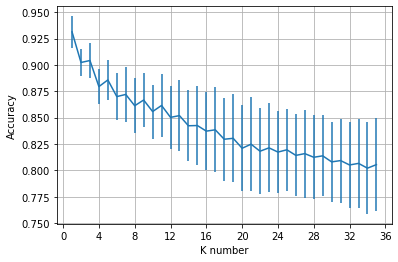

In [22]:
# import matplotlib library
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# calculate SD for error bar (I use 1±SD)
x_axis = k_range
y_axis = [np.mean(scores[k]) for k in k_range]
error = [np.std(scores[k]) for k in k_range]
# plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, y_axis, yerr=error)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.xlabel('K number')
plt.ylabel('Accuracy')
plt.show()

In [23]:
# select the best k number
best_k = y_axis.index(max(y_axis))
print('The best K number from 1 to 10 is:', best_k+1)
print('Accuracy of K =', best_k+1, 'is', y_axis[best_k])

The best K number from 1 to 10 is: 1
Accuracy of K = 1 is 0.9312915321537177


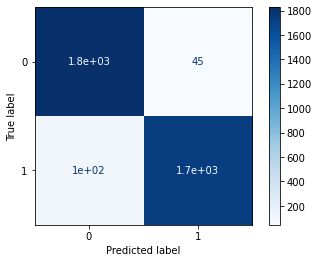

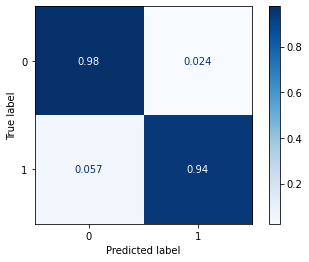

In [24]:
# confusion matrix for best k
best_knn = KNeighborsClassifier(n_neighbors = y[best_k])
best_knn.fit(x_train,y_train)
y_pred = best_knn.predict(x_test)

# count and plot with sklearn
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_knn, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)

In [25]:
matrix = pd.DataFrame()
matrix['true_BikeBuyer'] = y_test
matrix['predict_BikeBuyer'] = y_pred
matrix.head()

,true_BikeBuyer,predict_BikeBuyer
10593,1,1
15306,1,1
8834,0,0
11665,1,0
11481,1,1


In [26]:
# predict BikeBuyer = 1
TP = len(matrix[(matrix['true_BikeBuyer'] == 1) & (matrix['predict_BikeBuyer'] == 1)])
FN = len(matrix[(matrix['true_BikeBuyer'] == 1) & (matrix['predict_BikeBuyer'] == 0)])
FP = len(matrix[(matrix['true_BikeBuyer'] == 0) & (matrix['predict_BikeBuyer'] == 1)])
TN = len(matrix[(matrix['true_BikeBuyer'] == 0) & (matrix['predict_BikeBuyer'] == 0)])

print('Entire data row count is ', x.shape[0])
print('We split 20% of entire data to sample set, so 20% of ' + str(x.shape[0]) + ' is equal to ' + str(x.shape[0]*.20))
print('')
print('Acutally sample row count of test set is: ', x_test.shape[0])
print('')
print('True positive, Actually 1 and we predict 1 is ', TP)
print('False negative, Actually 1 but we predict 0 is ', FN)
print('False positive, Actually 0 but we predict 1 is ', FP)
print('True negative, Acually 0 and we predict 0 is ', TN)

Entire data row count is  18484
We split 20% of entire data to sample set, so 20% of 18484 is equal to 3696.8

Acutally sample row count of test set is:  3697

True positive, Actually 1 and we predict 1 is  1722
False negative, Actually 1 but we predict 0 is  104
False positive, Actually 0 but we predict 1 is  45
True negative, Acually 0 and we predict 0 is  1826


![title](https://raw.githubusercontent.com/superbijk/assignment-knn2/main/data_count.PNG?token=AMGZUG5RYFS3W72C7OLWRAC7TRLD4)

![title](https://raw.githubusercontent.com/superbijk/assignment-knn2/main/equations.PNG?token=AMGZUG4NQLGCONBJTRR74ZK7TRLGC)

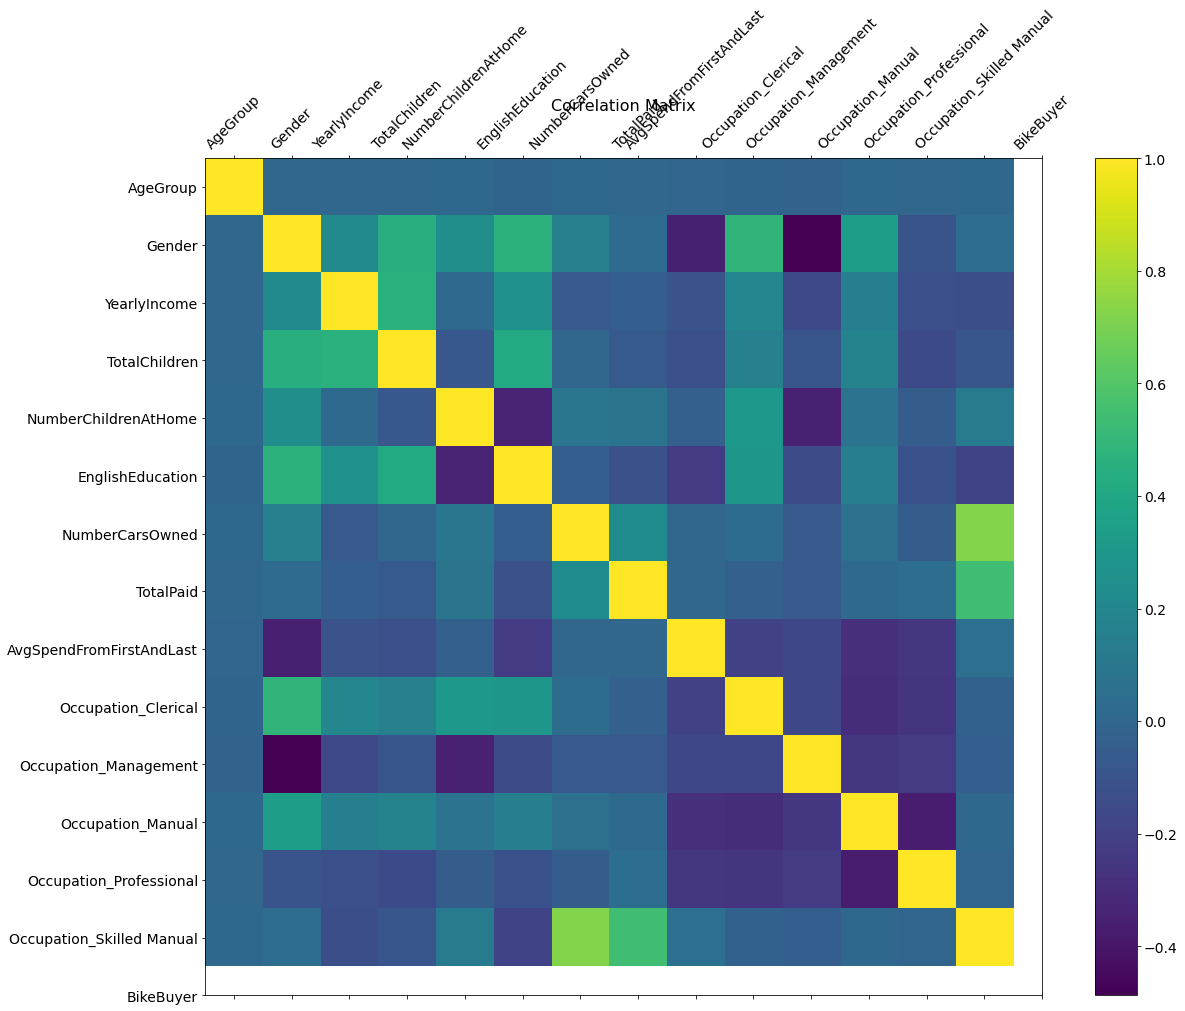

In [27]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(data_prep.corr(), fignum=f.number)
plt.xticks(range(data_prep.shape[1]), data_prep.columns, fontsize=14, rotation=45)
plt.yticks(range(data_prep.shape[1]), data_prep.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

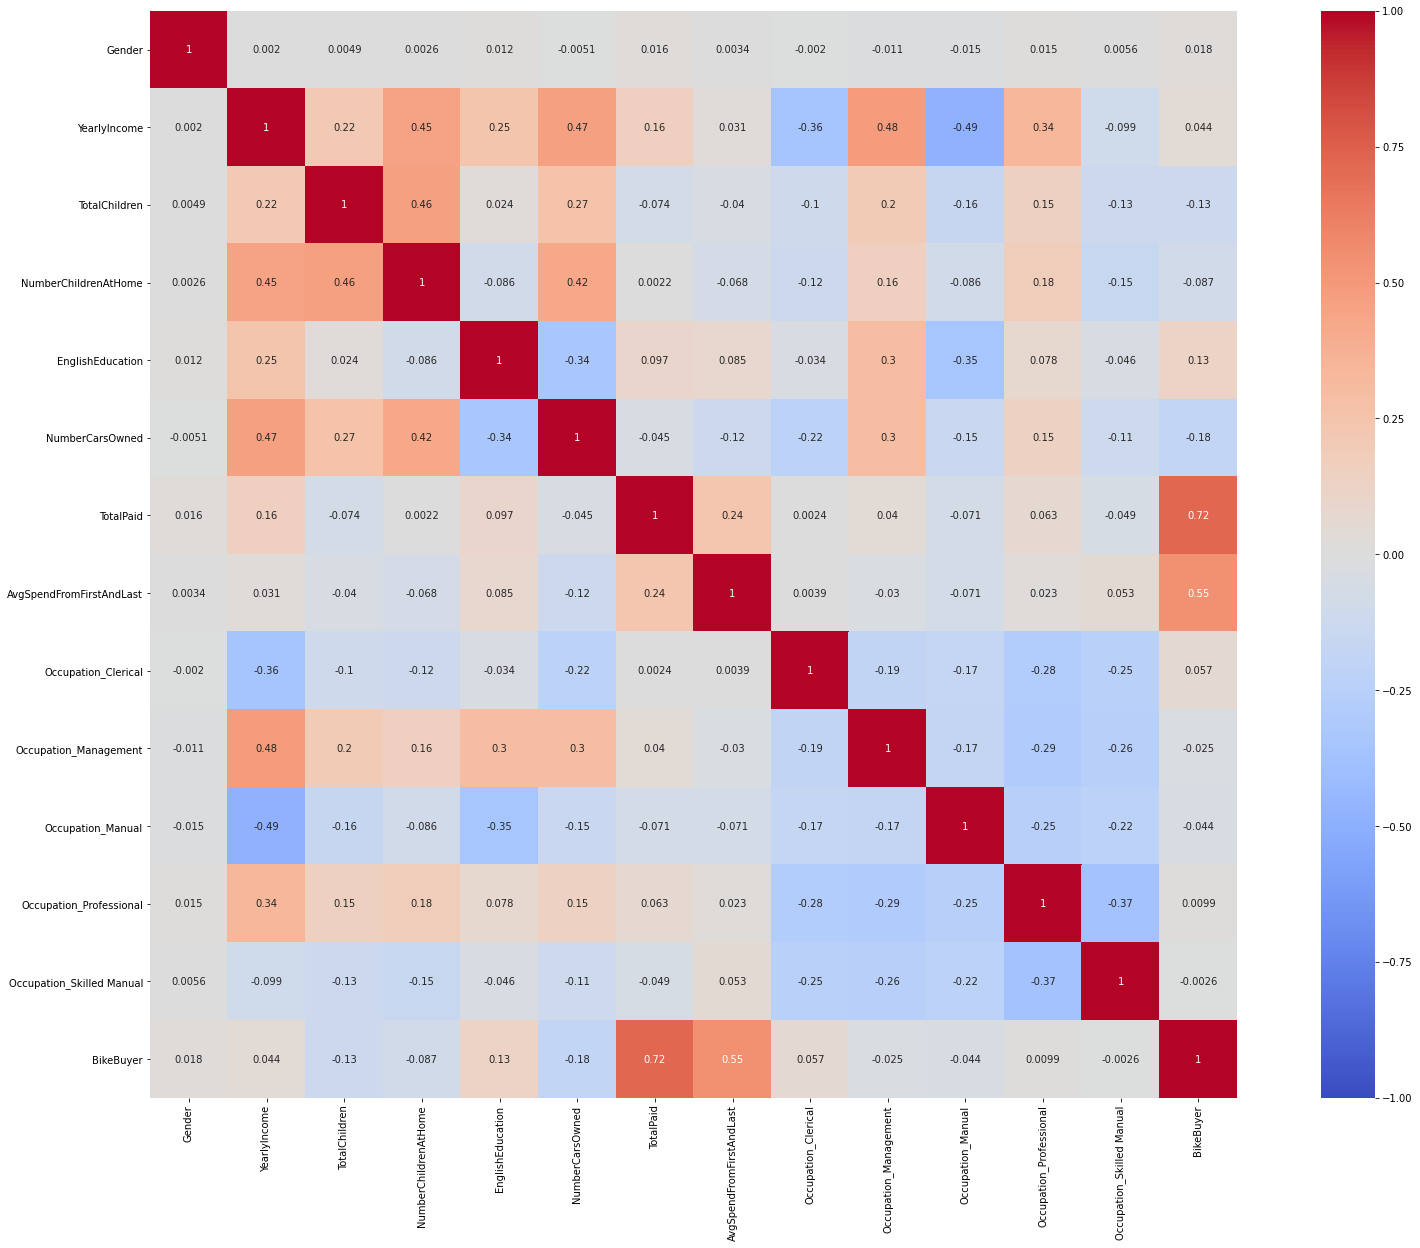

In [28]:
import seaborn as sns
plt.figure(figsize = (30,20))
sns.heatmap(data_prep.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True)

In [29]:
data_prep.corr()

,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,NumberCarsOwned,TotalPaid,AvgSpendFromFirstAndLast,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,BikeBuyer
Gender,1.000000,0.001965,0.004935,0.002625,0.012094,-0.005058,0.015660,0.003445,-0.001996,-0.010567,-0.014509,0.015499,0.005638,0.018365
YearlyIncome,0.001965,1.000000,0.215923,0.452133,0.249907,0.466647,0.161680,0.030917,-0.357390,0.484556,-0.486944,0.341151,-0.099343,0.043551
TotalChildren,0.004935,0.215923,1.000000,0.461224,0.023650,0.265405,-0.073806,-0.040419,-0.104236,0.203052,-0.160367,0.153903,-0.125670,-0.127152
NumberChildrenAtHome,0.002625,0.452133,0.461224,1.000000,-0.086046,0.424191,0.002193,-0.067761,-0.123966,0.161009,-0.086469,0.175507,-0.152996,-0.086707
EnglishEducation,0.012094,0.249907,0.023650,-0.086046,1.000000,-0.337492,0.096806,0.084533,-0.033846,0.303940,-0.347835,0.077790,-0.045980,0.130860
NumberCarsOwned,-0.005058,0.466647,0.265405,0.424191,-0.337492,1.000000,-0.044747,-0.118866,-0.223738,0.301710,-0.147811,0.146427,-0.111525,-0.180865
TotalPaid,0.015660,0.161680,-0.073806,0.002193,0.096806,-0.044747,1.000000,0.239051,0.002383,0.039923,-0.070563,0.063464,-0.048958,0.724472
AvgSpendFromFirstAndLast,0.003445,0.030917,-0.040419,-0.067761,0.084533,-0.118866,0.239051,1.000000,0.003917,-0.029788,-0.070611,0.022774,0.053071,0.546531
Occupation_Clerical,-0.001996,-0.357390,-0.104236,-0.123966,-0.033846,-0.223738,0.002383,0.003917,1.000000,-0.193808,-0.166946,-0.283098,-0.248892,0.057028
Occupation_Management,-0.010567,0.484556,0.203052,0.161009,0.303940,0.301710,0.039923,-0.029788,-0.193808,1.000000,-0.171900,-0.291498,-0.256277,-0.025047


# **KNN without TotalPaid and AvgSpendFromFirstAndLast**

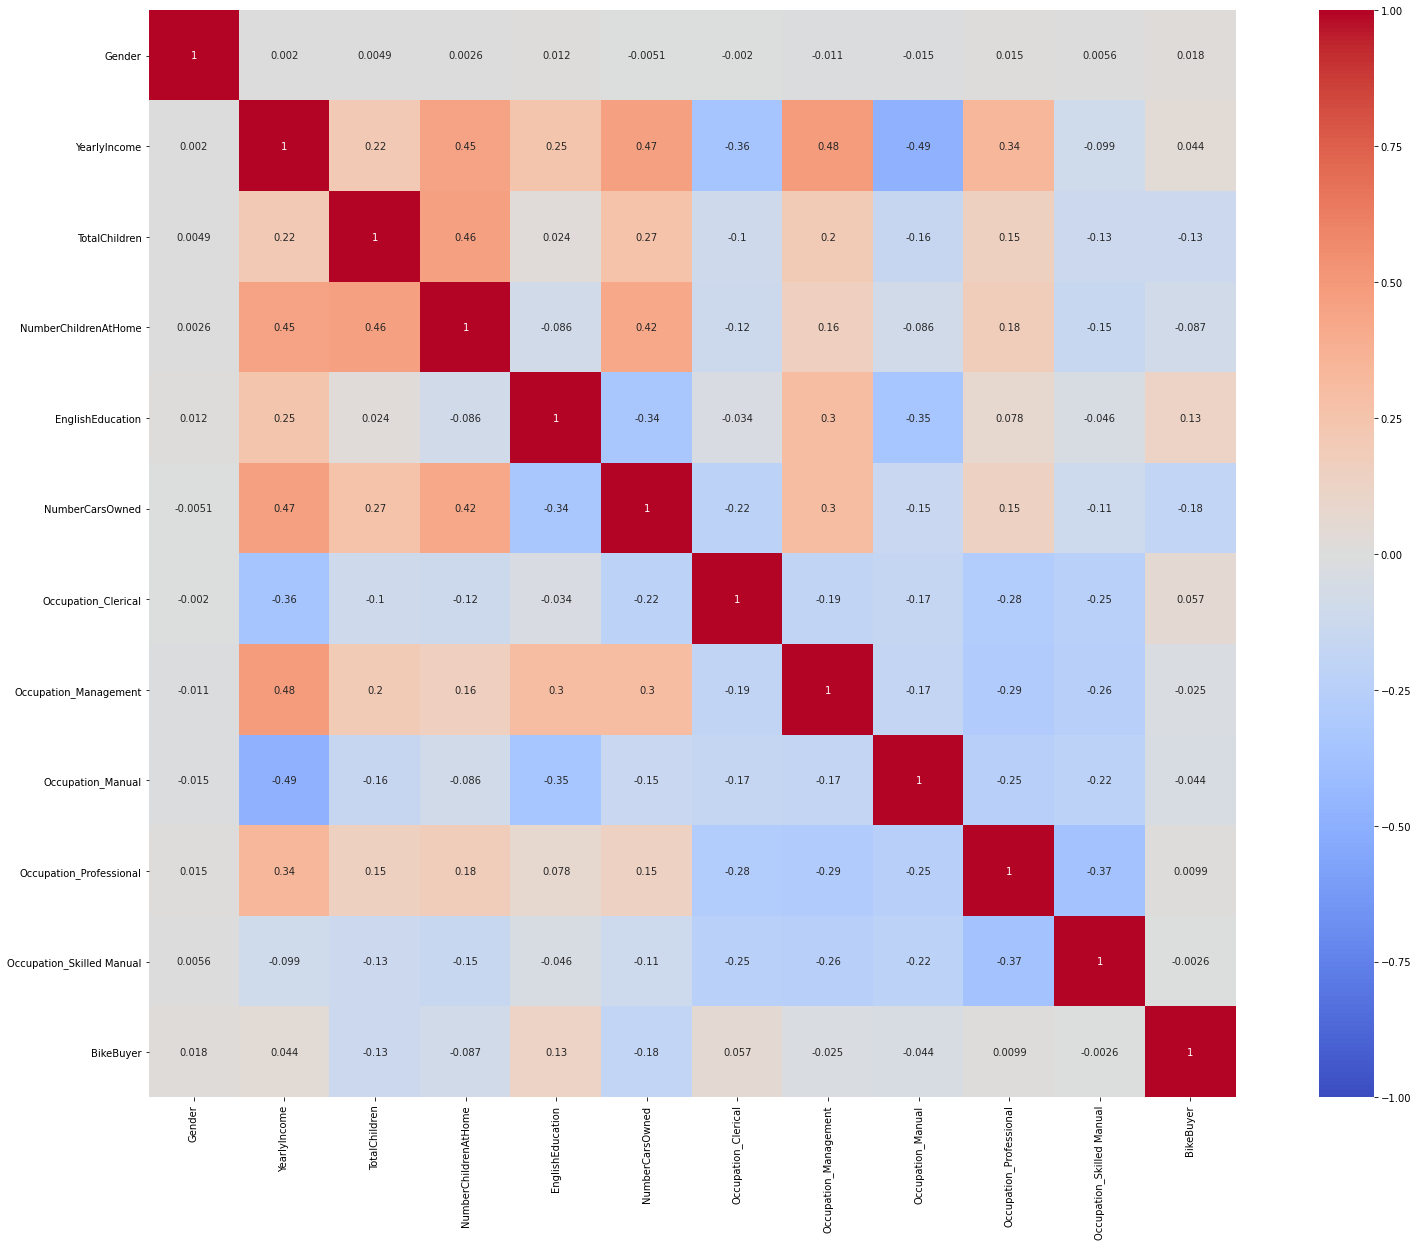

In [30]:
data_prep2 = data_prep

data_prep2 = data_prep2.drop(columns=['TotalPaid', 'AvgSpendFromFirstAndLast'], axis = 1)
import seaborn as sns
plt.figure(figsize = (30,20))
sns.heatmap(data_prep2.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True)

In [31]:
# import KNN library
from sklearn import metrics

# select parameter (x) and target (y)
x=data_prep2.iloc[:,:-1] #all parameters
y=data_prep2['BikeBuyer'] #target

#split dataset into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

print('shape of train sample is: ', x_train.shape)
print('shape of test sample is: ', x_test.shape)

# import knn library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# set up k of KNN and n of cross validation
scores = {} # dictionary, key is n of KNN and value is list of score
k_range = range(1,36)
cross_count = 5

for k in k_range:
  knn_cv = KNeighborsClassifier(n_neighbors=k) 
  cv_scores = cross_val_score(knn_cv, x, y, cv=cross_count)
  print('k=' + str(k) + str(cv_scores))
  scores[k] = cv_scores

shape of train sample is:  (14787, 12)
shape of test sample is:  (3697, 12)
k=1[0.55991344 0.65025697 0.65404382 0.66946173 0.6387987 ]
k=2[0.56045442 0.63592102 0.65485529 0.65674872 0.63122294]
k=3[0.56505275 0.64295375 0.67027319 0.68596159 0.6577381 ]
k=4[0.55504463 0.65052745 0.67838788 0.67892886 0.66693723]
k=5[0.55558561 0.66269949 0.67703543 0.69732215 0.68235931]
k=6[0.57019205 0.66188802 0.67757641 0.69191236 0.68858225]
k=7[0.5558561  0.66107655 0.69218285 0.70300243 0.69345238]
k=8[0.55450365 0.66648634 0.68406816 0.7038139  0.70670996]
k=9[0.56802813 0.66648634 0.69218285 0.71517447 0.70779221]
k=10[0.56180687 0.66324047 0.688396   0.7167974  0.70427489]
k=11[0.55937246 0.66702732 0.70219097 0.71814985 0.70508658]
k=12[0.55802002 0.66648634 0.70110901 0.72626454 0.69859307]
k=13[0.5531512  0.67622397 0.71192859 0.72410062 0.71672078]
k=14[0.56072491 0.67216662 0.71869083 0.73221531 0.7150974 ]
k=15[0.558561   0.67622397 0.70787125 0.7324858  0.71753247]
k=16[0.56505275 0.

In [32]:
# preview accuracy score for each K
scoredf = pd.DataFrame(data=scores)
scoredf.columns = ['K' + str(x) for i, x in enumerate(scoredf)]
scoredf

,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18,K19,K20,K21,K22,K23,K24,K25,K26,K27,K28,K29,K30,K31,K32,K33,K34,K35
0,0.559913,0.560454,0.565053,0.555045,0.555586,0.570192,0.555856,0.554504,0.568028,0.561807,0.559372,0.558020,0.553151,0.560725,0.558561,0.565053,0.552881,0.552340,0.554504,0.554504,0.553692,0.549094,0.547741,0.543414,0.549635,0.548282,0.551258,0.547200,0.548012,0.541250,0.540438,0.544225,0.547741,0.549635,0.548282
1,0.650257,0.635921,0.642954,0.650527,0.662699,0.661888,0.661077,0.666486,0.666486,0.663240,0.667027,0.666486,0.676224,0.672167,0.676224,0.664322,0.662159,0.668109,0.663781,0.663240,0.663781,0.658913,0.659724,0.656208,0.668380,0.674872,0.682716,0.685421,0.686503,0.685421,0.686232,0.674872,0.682175,0.680552,0.679199
2,0.654044,0.654855,0.670273,0.678388,0.677035,0.677576,0.692183,0.684068,0.692183,0.688396,0.702191,0.701109,0.711929,0.718691,0.707871,0.705166,0.702732,0.702461,0.707601,0.699757,0.704084,0.710847,0.716797,0.712740,0.717879,0.725994,0.726535,0.724912,0.723560,0.723830,0.722748,0.719502,0.718691,0.718961,0.721666
3,0.669462,0.656749,0.685962,0.678929,0.697322,0.691912,0.703002,0.703814,0.715174,0.716797,0.718150,0.726265,0.724101,0.732215,0.732486,0.730051,0.735461,0.724642,0.727887,0.724642,0.721125,0.729510,0.734109,0.734650,0.737625,0.729510,0.738437,0.726806,0.735191,0.728158,0.729240,0.725453,0.733027,0.732486,0.726806
4,0.638799,0.631223,0.657738,0.666937,0.682359,0.688582,0.693452,0.706710,0.707792,0.704275,0.705087,0.698593,0.716721,0.715097,0.717532,0.719156,0.713203,0.708874,0.715368,0.706981,0.714556,0.707522,0.713203,0.712121,0.721320,0.710498,0.730249,0.710227,0.716991,0.704004,0.718885,0.709145,0.714827,0.708063,0.725379


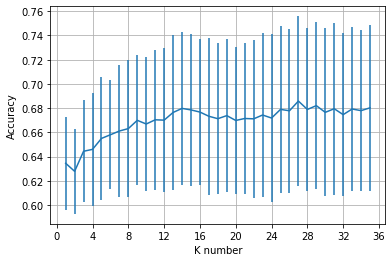

In [33]:
# import matplotlib library
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# calculate SD for error bar (I use 1±SD)
x_axis = k_range
y_axis = [np.mean(scores[k]) for k in k_range]
error = [np.std(scores[k]) for k in k_range]
# plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, y_axis, yerr=error)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.xlabel('K number')
plt.ylabel('Accuracy')
plt.show()